# Arbitrary Style Transfer in Real-time with Adaptive Instance Normalization

In [2]:
!git clone "https://github.com/mathisemb/AdaIN.git"

Cloning into 'AdaIN'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 26 (delta 6), reused 23 (delta 6), pack-reused 0
Unpacking objects: 100% (26/26), 234.59 KiB | 2.64 MiB/s, done.


In [3]:
%ls

AdaIN/


In [4]:
%cd AdaIN

/kaggle/working/AdaIN


In [5]:
%ls

README.md  dataset.py  encoder.py  loss.py     model.py
adain.py   decoder.py  images/     main.ipynb  requirements.txt


## Imports

In [6]:
import torch
import torchvision.transforms as transforms
from PIL import Image

## Define the model

In [7]:
from model import StyleTransfer, train_decoder
model = StyleTransfer()

Downloading: "https://github.com/pytorch/vision/zipball/v0.9.0" to /root/.cache/torch/hub/v0.9.0.zip
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|██████████| 548M/548M [00:03<00:00, 173MB/s]  


## Training of the decoder

### Datasets

In [8]:
from dataset import CIFAR10, ArtBench10
from torch.utils.data import DataLoader
from torch.utils.data import Subset

transform = transforms.Compose([
    transforms.Resize((32,32)),
    transforms.ToTensor()
])

# datasets
cifar10_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
artbench_dataset = ArtBench10(root='./data', train=True, transform=transform, download=True)

# choose the size of the training dataset
size = 512
indices = list(range(size))
cifar10_dataset = Subset(cifar10_dataset, indices)
artbench_dataset = Subset(artbench_dataset, indices)

# create the dataloaders
cifar10_loader = DataLoader(cifar10_dataset, batch_size=64, shuffle=True)
artbench_loader = DataLoader(artbench_dataset, batch_size=64, shuffle=True)

print("len(cifar10_dataset) =", len(cifar10_dataset), "images")
print("len(artbench_dataset) =", len(artbench_dataset), "images")

print("len(cifar10_loader) =", len(cifar10_loader), "batches")
print("len(artbench_loader) =", len(artbench_loader), "batches")

100%|██████████| 170498071/170498071 [00:03<00:00, 56199294.88it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


100%|██████████| 172959801/172959801 [00:04<00:00, 39267443.12it/s]


Extracting ./data/artbench-10-python.tar.gz to ./data
len(cifar10_dataset) = 500 images
len(artbench_dataset) = 500 images
len(cifar10_loader) = 8 batches
len(artbench_loader) = 8 batches


### Training

In [9]:
# Training
res = train_decoder(model=model,
                    content_loader=cifar10_loader,
                    style_loader=artbench_loader,
                    nb_epochs=100,
                    learning_rate=0.001,
                    lam=1.5)

Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

loss = 49.55313491821289
loss = 84.43831634521484
loss = 108.50062561035156
loss = 135.81103515625
loss = 200.04922485351562
loss = 182.92047119140625
loss = 174.36643981933594


Epochs:   1%|          | 1/100 [00:22<37:46, 22.89s/it]

loss = 171.90972900390625
loss = 179.40489196777344
loss = 194.603271484375
loss = 192.75852966308594
loss = 195.33180236816406
loss = 195.75021362304688
loss = 193.4836883544922
loss = 191.14866638183594


Epochs:   2%|▏         | 2/100 [00:45<37:12, 22.78s/it]

loss = 190.5978546142578
loss = 204.4803466796875
loss = 213.43861389160156
loss = 208.83645629882812
loss = 219.64288330078125
loss = 229.0269775390625
loss = 221.71102905273438
loss = 226.40701293945312


Epochs:   3%|▎         | 3/100 [01:08<36:38, 22.67s/it]

loss = 229.46658325195312
loss = 222.42530822753906
loss = 229.7765655517578
loss = 235.6150360107422
loss = 232.6334991455078
loss = 232.0115203857422
loss = 230.09906005859375
loss = 230.5149688720703


Epochs:   4%|▍         | 4/100 [01:30<35:50, 22.40s/it]

loss = 230.02528381347656
loss = 221.98538208007812
loss = 226.7701416015625
loss = 224.84657287597656
loss = 225.1083984375
loss = 223.5472869873047
loss = 219.23439025878906
loss = 222.23587036132812


Epochs:   5%|▌         | 5/100 [01:52<35:22, 22.34s/it]

loss = 218.75625610351562
loss = 214.62025451660156
loss = 219.32159423828125
loss = 217.3445587158203
loss = 210.80467224121094
loss = 208.93521118164062
loss = 213.29074096679688
loss = 202.27235412597656


Epochs:   6%|▌         | 6/100 [02:14<34:52, 22.27s/it]

loss = 198.2822265625
loss = 196.80728149414062
loss = 196.31607055664062
loss = 193.93630981445312
loss = 196.18898010253906
loss = 200.34120178222656
loss = 198.45916748046875
loss = 200.2207794189453


Epochs:   7%|▋         | 7/100 [02:36<34:28, 22.24s/it]

loss = 197.59317016601562
loss = 193.30825805664062
loss = 196.16513061523438
loss = 194.01889038085938
loss = 192.3608856201172
loss = 189.37411499023438
loss = 182.89915466308594
loss = 186.8874053955078


Epochs:   8%|▊         | 8/100 [02:58<33:55, 22.12s/it]

loss = 184.22579956054688
loss = 177.75942993164062
loss = 184.44833374023438
loss = 180.57908630371094
loss = 183.51206970214844
loss = 174.5199432373047
loss = 169.44757080078125
loss = 171.6556854248047


Epochs:   9%|▉         | 9/100 [03:21<33:43, 22.24s/it]

loss = 174.93423461914062
loss = 174.230224609375
loss = 174.2692413330078
loss = 172.05105590820312
loss = 170.64437866210938
loss = 171.89617919921875
loss = 163.9706573486328
loss = 163.9933319091797


Epochs:  10%|█         | 10/100 [03:43<33:29, 22.33s/it]

loss = 163.35647583007812
loss = 166.57838439941406
loss = 167.24571228027344
loss = 165.04124450683594
loss = 159.6453399658203
loss = 160.744140625
loss = 157.77865600585938
loss = 158.0497283935547


Epochs:  11%|█         | 11/100 [04:05<33:03, 22.29s/it]

loss = 152.5959930419922
loss = 155.849853515625
loss = 153.49383544921875
loss = 150.59341430664062
loss = 148.9376678466797
loss = 149.31082153320312
loss = 150.31997680664062
loss = 148.60516357421875


Epochs:  12%|█▏        | 12/100 [04:28<32:52, 22.41s/it]

loss = 144.79502868652344
loss = 149.1510772705078
loss = 145.04531860351562
loss = 148.48072814941406
loss = 141.08773803710938
loss = 140.15858459472656
loss = 138.92495727539062
loss = 137.0275115966797


Epochs:  13%|█▎        | 13/100 [04:51<32:40, 22.53s/it]

loss = 141.34747314453125
loss = 137.55792236328125
loss = 138.56396484375
loss = 138.96739196777344
loss = 135.9309539794922
loss = 134.31431579589844
loss = 136.99085998535156
loss = 134.77090454101562


Epochs:  14%|█▍        | 14/100 [05:13<32:15, 22.51s/it]

loss = 134.34381103515625
loss = 133.95993041992188
loss = 132.75631713867188
loss = 133.8074951171875
loss = 133.03289794921875
loss = 132.76947021484375
loss = 128.64878845214844
loss = 127.35627746582031


Epochs:  15%|█▌        | 15/100 [05:35<31:43, 22.39s/it]

loss = 129.82106018066406
loss = 127.0336685180664
loss = 122.11371612548828
loss = 125.04444885253906
loss = 123.3680648803711
loss = 123.06963348388672
loss = 122.92543029785156
loss = 122.19222259521484


Epochs:  16%|█▌        | 16/100 [05:58<31:17, 22.35s/it]

loss = 122.4198226928711
loss = 122.88414001464844
loss = 122.8219985961914
loss = 121.34902954101562
loss = 117.22026824951172
loss = 115.79523468017578
loss = 115.22938537597656
loss = 113.99678802490234


Epochs:  17%|█▋        | 17/100 [06:20<30:53, 22.33s/it]

loss = 115.76752471923828
loss = 110.84545135498047
loss = 110.94429779052734
loss = 110.89249420166016
loss = 115.2170639038086
loss = 109.4327163696289
loss = 116.94779968261719
loss = 115.55181884765625


Epochs:  18%|█▊        | 18/100 [06:42<30:17, 22.17s/it]

loss = 114.21823120117188
loss = 111.28939056396484
loss = 117.16031646728516
loss = 111.73593139648438
loss = 112.97821807861328
loss = 115.57687377929688
loss = 109.71992492675781
loss = 112.65164947509766


Epochs:  19%|█▉        | 19/100 [07:04<29:59, 22.22s/it]

loss = 112.34595489501953
loss = 109.98809051513672
loss = 112.49625396728516
loss = 110.20471954345703
loss = 110.5381088256836
loss = 107.23949432373047
loss = 108.11344146728516
loss = 108.80866241455078


Epochs:  20%|██        | 20/100 [07:27<29:50, 22.38s/it]

loss = 109.22753143310547
loss = 107.43699645996094
loss = 104.99493408203125
loss = 103.99261474609375
loss = 106.299072265625
loss = 106.20848083496094
loss = 111.4603042602539
loss = 103.60525512695312


Epochs:  21%|██        | 21/100 [07:49<29:13, 22.20s/it]

loss = 103.8407211303711
loss = 110.15715026855469
loss = 104.72103118896484
loss = 105.47390747070312
loss = 107.04021453857422
loss = 103.46695709228516
loss = 105.78713989257812
loss = 103.80094909667969


Epochs:  22%|██▏       | 22/100 [08:11<29:00, 22.31s/it]

loss = 105.5007553100586
loss = 107.052734375
loss = 107.25199127197266
loss = 103.08761596679688
loss = 105.07758331298828
loss = 106.06314849853516
loss = 107.22073364257812
loss = 100.58352661132812


Epochs:  23%|██▎       | 23/100 [08:34<28:46, 22.43s/it]

loss = 104.06668090820312
loss = 106.92094421386719
loss = 100.01802825927734
loss = 101.78620147705078
loss = 103.02587890625
loss = 100.94960021972656
loss = 98.68415832519531
loss = 100.92256164550781


Epochs:  24%|██▍       | 24/100 [08:56<28:27, 22.47s/it]

loss = 102.74042510986328
loss = 103.2448501586914
loss = 97.22520446777344
loss = 101.09886169433594
loss = 103.12293243408203
loss = 104.41741943359375
loss = 101.46863555908203
loss = 101.32706451416016


Epochs:  25%|██▌       | 25/100 [09:18<27:50, 22.27s/it]

loss = 98.68722534179688
loss = 102.02156066894531
loss = 101.53655242919922
loss = 102.21378326416016
loss = 99.92672729492188
loss = 99.23257446289062
loss = 98.13729858398438
loss = 98.91282653808594


Epochs:  26%|██▌       | 26/100 [09:41<27:34, 22.36s/it]

loss = 95.8538589477539
loss = 99.28459167480469
loss = 98.21664428710938
loss = 97.44274139404297
loss = 99.94927978515625
loss = 99.60256958007812
loss = 95.05857849121094
loss = 93.2087173461914


Epochs:  27%|██▋       | 27/100 [10:03<27:18, 22.45s/it]

loss = 94.44368743896484
loss = 96.2383804321289
loss = 97.09636688232422
loss = 94.63178253173828
loss = 93.94110870361328
loss = 95.58468627929688
loss = 98.40155792236328
loss = 93.32158660888672


Epochs:  28%|██▊       | 28/100 [10:25<26:46, 22.31s/it]

loss = 90.8117446899414
loss = 94.86701965332031
loss = 93.76202392578125
loss = 94.38357543945312
loss = 93.2366714477539
loss = 91.8719482421875
loss = 95.8580551147461
loss = 90.31492614746094


Epochs:  29%|██▉       | 29/100 [10:48<26:25, 22.33s/it]

loss = 96.77342987060547
loss = 96.27080535888672
loss = 95.52621459960938
loss = 91.39459228515625
loss = 96.71057891845703
loss = 92.69623565673828
loss = 93.7988052368164
loss = 96.47594451904297


Epochs:  30%|███       | 30/100 [11:10<26:07, 22.39s/it]

loss = 95.67098236083984
loss = 94.13790130615234
loss = 89.94208526611328
loss = 89.69058227539062
loss = 93.1169204711914
loss = 86.99955749511719
loss = 87.99166107177734
loss = 89.7341537475586


Epochs:  31%|███       | 31/100 [11:33<25:41, 22.35s/it]

loss = 90.93364715576172
loss = 90.54754638671875
loss = 88.73522186279297
loss = 88.13096618652344
loss = 88.18074035644531
loss = 88.79036712646484
loss = 88.63343811035156
loss = 91.76371002197266


Epochs:  32%|███▏      | 32/100 [11:55<25:21, 22.37s/it]

loss = 89.88278198242188
loss = 86.07271575927734
loss = 89.72880554199219
loss = 84.52183532714844
loss = 86.37615203857422
loss = 92.73583984375
loss = 90.23970031738281
loss = 90.72452545166016


Epochs:  33%|███▎      | 33/100 [12:17<24:58, 22.37s/it]

loss = 88.8488540649414
loss = 89.34593200683594
loss = 91.54938507080078
loss = 90.29777526855469
loss = 88.39310455322266
loss = 86.91732025146484
loss = 88.24378967285156
loss = 88.84728240966797


Epochs:  34%|███▍      | 34/100 [12:40<24:36, 22.37s/it]

loss = 86.76937103271484
loss = 87.10982513427734
loss = 85.65977478027344
loss = 86.45960998535156
loss = 84.70830535888672
loss = 86.37370300292969
loss = 90.0750961303711
loss = 91.3084487915039


Epochs:  35%|███▌      | 35/100 [13:01<24:01, 22.17s/it]

loss = 87.29808807373047
loss = 87.55931091308594
loss = 86.74812316894531
loss = 86.43863677978516
loss = 86.64326477050781
loss = 89.72183227539062
loss = 87.94884490966797
loss = 88.24821472167969


Epochs:  36%|███▌      | 36/100 [13:24<23:38, 22.17s/it]

loss = 86.76820373535156
loss = 83.92206573486328
loss = 83.8635025024414
loss = 84.90656280517578
loss = 85.97412109375
loss = 83.91182708740234
loss = 89.39492797851562
loss = 86.98320007324219


Epochs:  37%|███▋      | 37/100 [13:46<23:26, 22.32s/it]

loss = 86.19580841064453
loss = 86.41744995117188
loss = 83.92355346679688
loss = 84.79503631591797
loss = 82.4765853881836
loss = 84.67229461669922
loss = 87.91931915283203
loss = 86.7064208984375


Epochs:  38%|███▊      | 38/100 [14:08<22:48, 22.08s/it]

loss = 86.00550079345703
loss = 86.3863525390625
loss = 86.5188217163086
loss = 87.87369537353516
loss = 87.40574645996094
loss = 80.98651123046875
loss = 85.74545288085938
loss = 88.62947082519531


Epochs:  39%|███▉      | 39/100 [14:30<22:23, 22.02s/it]

loss = 83.35188293457031
loss = 87.10289764404297
loss = 83.6409912109375
loss = 83.28543853759766
loss = 88.19309997558594
loss = 88.08116912841797
loss = 85.24685668945312
loss = 86.18811798095703


Epochs:  40%|████      | 40/100 [14:52<22:11, 22.20s/it]

loss = 83.839111328125
loss = 85.05094909667969
loss = 84.03157806396484
loss = 83.30359649658203
loss = 85.53388977050781
loss = 82.27471923828125
loss = 82.5094223022461
loss = 82.88270568847656


Epochs:  41%|████      | 41/100 [15:15<22:02, 22.42s/it]

loss = 87.40184783935547
loss = 81.7117691040039
loss = 80.9902572631836
loss = 82.0617446899414
loss = 84.60774230957031
loss = 81.84456634521484
loss = 84.623291015625
loss = 84.89799499511719


Epochs:  42%|████▏     | 42/100 [15:38<21:50, 22.59s/it]

loss = 87.35990905761719
loss = 81.4654541015625
loss = 84.2154541015625
loss = 85.2007827758789
loss = 84.29747009277344
loss = 84.40758514404297
loss = 85.6058120727539
loss = 82.14275360107422


Epochs:  43%|████▎     | 43/100 [16:01<21:31, 22.66s/it]

loss = 83.12007141113281
loss = 80.53211212158203
loss = 82.1256103515625
loss = 81.83594512939453
loss = 78.99504852294922
loss = 84.6955795288086
loss = 79.52970886230469
loss = 84.10189056396484


Epochs:  44%|████▍     | 44/100 [16:24<21:18, 22.83s/it]

loss = 85.62268829345703
loss = 83.86676788330078
loss = 84.87872314453125
loss = 83.14603424072266
loss = 82.88263702392578
loss = 83.23916625976562
loss = 81.91858673095703
loss = 80.40189361572266


Epochs:  45%|████▌     | 45/100 [16:47<20:48, 22.70s/it]

loss = 82.15604400634766
loss = 88.33152770996094
loss = 79.30764770507812
loss = 79.77351379394531
loss = 84.14299774169922
loss = 80.13228607177734
loss = 80.15331268310547
loss = 82.68164825439453


Epochs:  46%|████▌     | 46/100 [17:10<20:30, 22.79s/it]

loss = 79.2991714477539
loss = 84.16459655761719
loss = 82.0815200805664
loss = 79.0615005493164
loss = 82.30097198486328
loss = 81.26594543457031
loss = 81.77561950683594
loss = 75.85395812988281


Epochs:  47%|████▋     | 47/100 [17:32<20:00, 22.65s/it]

loss = 76.09959411621094
loss = 82.16827392578125
loss = 81.59772491455078
loss = 81.7403335571289
loss = 77.44029235839844
loss = 82.28116607666016
loss = 79.80670928955078
loss = 83.86943054199219


Epochs:  48%|████▊     | 48/100 [17:54<19:30, 22.51s/it]

loss = 81.17743682861328
loss = 80.77706909179688
loss = 79.82380676269531
loss = 76.60981750488281
loss = 80.99407958984375
loss = 81.460205078125
loss = 80.99223327636719
loss = 81.9961929321289


Epochs:  49%|████▉     | 49/100 [18:17<19:11, 22.58s/it]

loss = 78.0869369506836
loss = 81.61979675292969
loss = 82.31210327148438
loss = 80.05029296875
loss = 78.79080200195312
loss = 80.70893859863281
loss = 77.28710174560547
loss = 79.2665023803711


Epochs:  50%|█████     | 50/100 [18:40<18:50, 22.61s/it]

loss = 77.29141235351562
loss = 78.11052703857422
loss = 80.70864868164062
loss = 79.98311614990234
loss = 78.40386199951172
loss = 78.22767639160156
loss = 81.02800750732422
loss = 77.981201171875


Epochs:  51%|█████     | 51/100 [19:03<18:34, 22.74s/it]

loss = 78.24430847167969
loss = 80.19315338134766
loss = 77.77118682861328
loss = 78.80619049072266
loss = 79.29442596435547
loss = 78.65744018554688
loss = 78.17013549804688
loss = 83.04046630859375


Epochs:  52%|█████▏    | 52/100 [19:25<18:08, 22.67s/it]

loss = 78.58833312988281
loss = 80.74636840820312
loss = 78.58724975585938
loss = 80.0794448852539
loss = 81.0529556274414
loss = 75.75102996826172
loss = 77.4394302368164
loss = 79.3990249633789


Epochs:  53%|█████▎    | 53/100 [19:48<17:51, 22.80s/it]

loss = 79.23308563232422
loss = 79.15011596679688
loss = 79.74781799316406
loss = 78.83914184570312
loss = 75.93211364746094
loss = 77.46710205078125
loss = 75.46821594238281
loss = 78.99287414550781


Epochs:  54%|█████▍    | 54/100 [20:12<17:35, 22.95s/it]

loss = 80.72662353515625
loss = 75.71763610839844
loss = 81.16676330566406
loss = 77.53156280517578
loss = 75.32325744628906
loss = 77.51254272460938
loss = 78.23624420166016
loss = 77.80020141601562


Epochs:  55%|█████▌    | 55/100 [20:34<17:05, 22.80s/it]

loss = 79.40718841552734
loss = 79.71509552001953
loss = 75.53065490722656
loss = 77.35230255126953
loss = 77.18830871582031
loss = 73.5677261352539
loss = 75.5003890991211
loss = 75.7197036743164


Epochs:  56%|█████▌    | 56/100 [20:57<16:45, 22.85s/it]

loss = 77.76200103759766
loss = 79.64359283447266
loss = 76.89067077636719
loss = 78.17424774169922
loss = 75.4403076171875
loss = 75.65677642822266
loss = 76.15502166748047
loss = 77.99015045166016


Epochs:  57%|█████▋    | 57/100 [21:20<16:28, 23.00s/it]

loss = 79.0873794555664
loss = 76.83853912353516
loss = 76.21836853027344
loss = 75.16521453857422
loss = 77.37701416015625
loss = 77.61270141601562
loss = 77.51252746582031
loss = 77.26966857910156


Epochs:  58%|█████▊    | 58/100 [21:43<16:04, 22.97s/it]

loss = 75.52710723876953
loss = 74.97801971435547
loss = 75.49446868896484
loss = 76.6101303100586
loss = 78.05892944335938
loss = 77.44366455078125
loss = 79.60555267333984
loss = 76.77767181396484


Epochs:  59%|█████▉    | 59/100 [22:06<15:37, 22.86s/it]

loss = 79.98408508300781
loss = 75.74578094482422
loss = 74.19908142089844
loss = 77.74716186523438
loss = 78.76262664794922
loss = 80.11907958984375
loss = 74.47624969482422
loss = 75.93263244628906


Epochs:  60%|██████    | 60/100 [22:29<15:14, 22.87s/it]

loss = 78.0067138671875
loss = 78.28942108154297
loss = 75.13034057617188
loss = 78.14830017089844
loss = 75.18983459472656
loss = 74.42499542236328
loss = 74.95166015625
loss = 75.98885345458984


Epochs:  61%|██████    | 61/100 [22:52<14:54, 22.95s/it]

loss = 69.91820526123047
loss = 76.58123779296875
loss = 77.19523620605469
loss = 73.73643493652344
loss = 72.87109375
loss = 72.5350570678711
loss = 75.5300521850586
loss = 76.37924194335938


Epochs:  62%|██████▏   | 62/100 [23:15<14:36, 23.06s/it]

loss = 74.27336120605469
loss = 75.08445739746094
loss = 74.09455871582031
loss = 75.70112609863281
loss = 74.19637298583984
loss = 78.12905883789062
loss = 77.23100280761719
loss = 76.69326782226562


Epochs:  63%|██████▎   | 63/100 [23:38<14:08, 22.92s/it]

loss = 72.25469207763672
loss = 78.41069793701172
loss = 77.32389068603516
loss = 72.12875366210938
loss = 75.48651123046875
loss = 72.18854522705078
loss = 74.49417114257812
loss = 75.02143859863281


Epochs:  64%|██████▍   | 64/100 [24:01<13:48, 23.02s/it]

loss = 72.64639282226562
loss = 73.53739166259766
loss = 71.11327362060547
loss = 75.56591796875
loss = 74.01622009277344
loss = 76.04280853271484
loss = 76.85520935058594
loss = 74.75869750976562


Epochs:  65%|██████▌   | 65/100 [24:24<13:29, 23.12s/it]

loss = 74.84873962402344
loss = 72.97404479980469
loss = 75.1954574584961
loss = 72.23856353759766
loss = 69.77080535888672
loss = 73.3045425415039
loss = 76.69129943847656
loss = 73.06446838378906


Epochs:  66%|██████▌   | 66/100 [24:47<13:01, 23.00s/it]

loss = 72.9747085571289
loss = 73.55097961425781
loss = 73.0861587524414
loss = 74.35248565673828
loss = 76.64509582519531
loss = 75.03942108154297
loss = 72.99317932128906
loss = 74.50688934326172


Epochs:  67%|██████▋   | 67/100 [25:10<12:40, 23.03s/it]

loss = 73.56867218017578
loss = 74.49662780761719
loss = 74.1860580444336
loss = 72.40641784667969
loss = 74.8516616821289
loss = 73.48023986816406
loss = 72.80323791503906
loss = 71.21592712402344


Epochs:  68%|██████▊   | 68/100 [25:33<12:18, 23.08s/it]

loss = 76.50140380859375
loss = 70.87749481201172
loss = 73.13208770751953
loss = 72.9079818725586
loss = 75.6942138671875
loss = 71.5429458618164
loss = 72.00611877441406
loss = 72.0781478881836


Epochs:  69%|██████▉   | 69/100 [25:57<11:59, 23.21s/it]

loss = 73.51798248291016
loss = 74.34542083740234
loss = 72.35343933105469
loss = 73.73008728027344
loss = 75.04598999023438
loss = 72.20079803466797
loss = 72.16094207763672
loss = 74.42761993408203


Epochs:  70%|███████   | 70/100 [26:20<11:32, 23.08s/it]

loss = 71.83627319335938
loss = 72.7884750366211
loss = 73.4486083984375
loss = 72.17176055908203
loss = 72.85243225097656
loss = 71.23878479003906
loss = 73.84310913085938
loss = 72.29917907714844


Epochs:  71%|███████   | 71/100 [26:43<11:11, 23.15s/it]

loss = 71.95741271972656
loss = 70.92597198486328
loss = 69.73533630371094
loss = 73.35289764404297
loss = 71.99909210205078
loss = 71.63851165771484
loss = 74.68508911132812
loss = 74.19233703613281


Epochs:  72%|███████▏  | 72/100 [27:06<10:49, 23.18s/it]

loss = 69.25394439697266
loss = 71.03004455566406
loss = 70.47345733642578
loss = 68.72686004638672
loss = 71.2386474609375
loss = 68.94599914550781
loss = 71.79019927978516
loss = 70.36283111572266


Epochs:  73%|███████▎  | 73/100 [27:29<10:19, 22.96s/it]

loss = 75.1664047241211
loss = 75.27415466308594
loss = 72.77890014648438
loss = 73.83916473388672
loss = 74.17166137695312
loss = 70.91193389892578
loss = 72.21161651611328
loss = 71.82510375976562


Epochs:  74%|███████▍  | 74/100 [27:52<09:57, 22.96s/it]

loss = 72.92684936523438
loss = 71.38509368896484
loss = 70.29544067382812
loss = 68.81305694580078
loss = 71.85199737548828
loss = 71.8915786743164
loss = 71.91424560546875
loss = 73.21769714355469


Epochs:  75%|███████▌  | 75/100 [28:15<09:33, 22.95s/it]

loss = 75.87284088134766
loss = 70.14209747314453
loss = 72.6688003540039
loss = 74.28975677490234
loss = 69.94244384765625
loss = 70.02757263183594
loss = 73.43437957763672
loss = 71.40772247314453


Epochs:  76%|███████▌  | 76/100 [28:38<09:11, 22.97s/it]

loss = 73.47085571289062
loss = 69.93138122558594
loss = 74.41709899902344
loss = 74.59324645996094
loss = 73.8530502319336
loss = 72.92061614990234
loss = 71.68803405761719
loss = 69.72355651855469


Epochs:  77%|███████▋  | 77/100 [29:00<08:44, 22.81s/it]

loss = 69.77558135986328
loss = 73.32205963134766
loss = 70.50978088378906
loss = 70.94254302978516
loss = 67.23289489746094
loss = 71.43999481201172
loss = 69.19290161132812
loss = 70.27616119384766


Epochs:  78%|███████▊  | 78/100 [29:23<08:24, 22.92s/it]

loss = 73.00228118896484
loss = 72.87039184570312
loss = 72.8163070678711
loss = 71.40000915527344
loss = 73.5650634765625
loss = 73.22449493408203
loss = 69.63294219970703
loss = 69.33885955810547


Epochs:  79%|███████▉  | 79/100 [29:46<08:03, 23.02s/it]

loss = 69.19319152832031
loss = 67.586669921875
loss = 69.80094909667969
loss = 71.60277557373047
loss = 74.152587890625
loss = 72.1014633178711
loss = 71.15573120117188
loss = 73.87693786621094


Epochs:  80%|████████  | 80/100 [30:10<07:41, 23.06s/it]

loss = 71.60987854003906
loss = 73.18939208984375
loss = 75.43511199951172
loss = 69.64688110351562
loss = 73.61531066894531
loss = 72.76095581054688
loss = 68.20328521728516
loss = 71.01464080810547


Epochs:  81%|████████  | 81/100 [30:32<07:14, 22.87s/it]

loss = 75.15821075439453
loss = 73.42082214355469
loss = 74.98136138916016
loss = 68.98768615722656
loss = 69.24700164794922
loss = 71.45549011230469
loss = 76.14270782470703
loss = 74.30046081542969


Epochs:  82%|████████▏ | 82/100 [30:55<06:51, 22.88s/it]

loss = 70.55496978759766
loss = 72.92200469970703
loss = 73.00840759277344
loss = 71.24755859375
loss = 72.73270416259766
loss = 75.10179138183594
loss = 72.0953140258789
loss = 73.03689575195312


Epochs:  83%|████████▎ | 83/100 [31:18<06:29, 22.90s/it]

loss = 71.02579498291016
loss = 72.3746109008789
loss = 75.6102066040039
loss = 75.09437561035156
loss = 72.90092468261719
loss = 72.54083251953125
loss = 68.41342163085938
loss = 67.12794494628906


Epochs:  84%|████████▍ | 84/100 [31:40<06:04, 22.77s/it]

loss = 69.68711853027344
loss = 72.4231185913086
loss = 70.03797149658203
loss = 68.5394287109375
loss = 68.95439147949219
loss = 70.61392211914062
loss = 71.78160095214844
loss = 70.89195251464844


Epochs:  85%|████████▌ | 85/100 [32:04<05:43, 22.92s/it]

loss = 72.46907806396484
loss = 69.18745422363281
loss = 72.09754180908203
loss = 74.84552001953125
loss = 70.2264404296875
loss = 70.56348419189453
loss = 71.0630111694336
loss = 73.62835693359375


Epochs:  86%|████████▌ | 86/100 [32:27<05:22, 23.03s/it]

loss = 68.32273864746094
loss = 71.84001159667969
loss = 70.98960876464844
loss = 71.29911804199219
loss = 75.6142349243164
loss = 72.33814239501953
loss = 71.78652954101562
loss = 68.8130874633789


Epochs:  87%|████████▋ | 87/100 [32:50<04:59, 23.04s/it]

loss = 68.59491729736328
loss = 71.18887329101562
loss = 71.52142333984375
loss = 68.116455078125
loss = 70.34532165527344
loss = 69.43050384521484
loss = 70.56755065917969
loss = 70.17736053466797


Epochs:  88%|████████▊ | 88/100 [33:13<04:34, 22.91s/it]

loss = 73.18115997314453
loss = 74.86602020263672
loss = 73.68063354492188
loss = 73.91930389404297
loss = 75.36353302001953
loss = 75.08283996582031
loss = 70.61228942871094
loss = 70.7409896850586


Epochs:  89%|████████▉ | 89/100 [33:35<04:12, 22.91s/it]

loss = 67.7277603149414
loss = 70.96086883544922
loss = 72.69338989257812
loss = 71.88811492919922
loss = 71.52792358398438
loss = 71.20848083496094
loss = 68.54013061523438
loss = 71.81752014160156


Epochs:  90%|█████████ | 90/100 [33:59<03:49, 22.98s/it]

loss = 69.47040557861328
loss = 70.35215759277344
loss = 70.67285919189453
loss = 70.93097686767578
loss = 69.31520080566406
loss = 69.99418640136719
loss = 71.67456817626953
loss = 71.78788757324219


Epochs:  91%|█████████ | 91/100 [34:22<03:26, 22.99s/it]

loss = 70.28471374511719
loss = 71.71764373779297
loss = 72.74394989013672
loss = 72.41522216796875
loss = 72.1141128540039
loss = 73.12454986572266
loss = 67.5468521118164
loss = 68.82571411132812


Epochs:  92%|█████████▏| 92/100 [34:45<03:03, 23.00s/it]

loss = 73.5496597290039
loss = 71.93470001220703
loss = 71.7406234741211
loss = 67.37675476074219
loss = 69.46881866455078
loss = 71.73253631591797
loss = 76.44758605957031
loss = 71.13607788085938


Epochs:  93%|█████████▎| 93/100 [35:08<02:41, 23.09s/it]

loss = 70.17902374267578
loss = 71.27513122558594
loss = 69.07908630371094
loss = 72.72489166259766
loss = 72.73810577392578
loss = 71.09144592285156
loss = 70.61702728271484
loss = 70.0232925415039


Epochs:  94%|█████████▍| 94/100 [35:31<02:18, 23.15s/it]

loss = 70.67646026611328
loss = 71.02286529541016
loss = 71.84886932373047
loss = 72.17334747314453
loss = 67.77725219726562
loss = 68.02761840820312
loss = 69.85112762451172
loss = 72.21055603027344


Epochs:  95%|█████████▌| 95/100 [35:54<01:55, 23.05s/it]

loss = 67.25505828857422
loss = 71.05870056152344
loss = 71.74093627929688
loss = 74.6441879272461
loss = 71.87264251708984
loss = 70.68563079833984
loss = 71.10685729980469
loss = 70.67779541015625


Epochs:  96%|█████████▌| 96/100 [36:17<01:32, 23.14s/it]

loss = 71.16477966308594
loss = 73.43539428710938
loss = 70.9200668334961
loss = 67.44971466064453
loss = 69.95188903808594
loss = 73.20805358886719
loss = 69.65293884277344
loss = 66.54500579833984


Epochs:  97%|█████████▋| 97/100 [36:40<01:09, 23.05s/it]

loss = 68.1067886352539
loss = 71.75312042236328
loss = 70.09457397460938
loss = 68.5104751586914
loss = 71.002197265625
loss = 68.01527404785156
loss = 66.69781494140625
loss = 68.072265625


Epochs:  98%|█████████▊| 98/100 [37:04<00:46, 23.12s/it]

loss = 72.22967529296875
loss = 71.30244445800781
loss = 71.5041732788086
loss = 67.39749908447266
loss = 70.0414810180664
loss = 70.55906677246094
loss = 72.83197021484375
loss = 70.21464538574219


Epochs:  99%|█████████▉| 99/100 [37:26<00:22, 23.00s/it]

loss = 71.90465545654297
loss = 66.49359130859375
loss = 69.63082122802734
loss = 71.71216583251953
loss = 72.16886138916016
loss = 69.45582580566406
loss = 69.4212417602539
loss = 69.43451690673828


Epochs: 100%|██████████| 100/100 [37:49<00:00, 22.70s/it]

loss = 73.98949432373047


## Load and preprocess the images

In [10]:
# Load the content and style images
content_img = Image.open("images/content/golden_gate.jpg")
style_img = Image.open("images/style/sketch.png")

# Preprocess the images
preprocess = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])

content_tensor = preprocess(content_img).unsqueeze(0)
style_tensor = preprocess(style_img).unsqueeze(0)

print("content_tensor:", content_tensor.shape)
print("style_tensor:", style_tensor.shape)

content_tensor: torch.Size([1, 3, 32, 32])
style_tensor: torch.Size([1, 3, 32, 32])


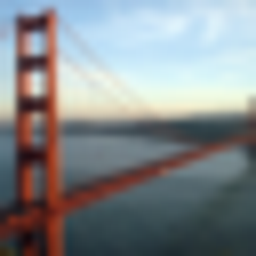

In [11]:
transforms.ToPILImage()(content_tensor.squeeze(0).cpu().clamp(0, 1)).resize((256,256))

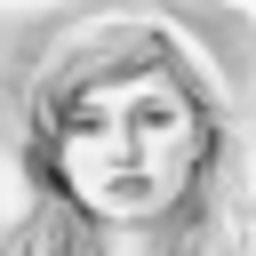

In [12]:
transforms.ToPILImage()(style_tensor.squeeze(0).cpu().clamp(0, 1)).resize((256,256))

## Run the model

In [17]:
with torch.no_grad():
    stylized_img = model(content_tensor, style_tensor)

## Print the result

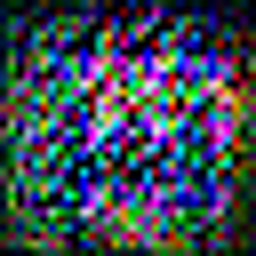

In [18]:
# Output the stylized image
output_img = transforms.ToPILImage()(stylized_img.squeeze(0).cpu().clamp(0, 1))
output_img.resize((256,256))